In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.models import Model
from keras.utils import plot_model
import torch
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
mfcc = torch.load('Mfcc_feature.pt')

In [3]:

input=[]
for m in mfcc['mfcc']:
    norm=normalize(m,axis=1)
    input.append(norm)

In [4]:
input=np.asarray(input).transpose(0,2,1)

In [5]:
input[0].shape

(400, 13)

In [6]:
timesteps = 400
n_features = 13

In [7]:
model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(timesteps,n_features), return_sequences=True))
model.add(LSTM(64, activation='relu', return_sequences=False))
model.add(RepeatVector(timesteps))
model.add(LSTM(64, activation='relu', return_sequences=True))
model.add(LSTM(128, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(n_features)))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 400, 128)          72704     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 400, 64)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 400, 64)           33024     
_________________________________________________________________
lstm_4 (LSTM)                (None, 400, 128)          98816     
_________________________________________________________________
time_distributed_1 (TimeDist (None, 400, 13)           1677      
Total params: 255,629
Trainable params: 255,629
Non-trainable params: 0
________________________________________________

In [22]:

hist=model.fit(input, input, epochs=300, verbose=1)

=====] - 1s 59ms/step - loss: 0.0024
Epoch 60/300
20/20 [==============================] - 1s 69ms/step - loss: 0.0023
Epoch 61/300
20/20 [==============================] - 1s 72ms/step - loss: 0.0023
Epoch 62/300
20/20 [==============================] - 1s 57ms/step - loss: 0.0023
Epoch 63/300
20/20 [==============================] - 1s 56ms/step - loss: 0.0023
Epoch 64/300
20/20 [==============================] - 1s 51ms/step - loss: 0.0023
Epoch 65/300
20/20 [==============================] - 1s 51ms/step - loss: 0.0023
Epoch 66/300
20/20 [==============================] - 1s 51ms/step - loss: 0.0023
Epoch 67/300
20/20 [==============================] - 1s 52ms/step - loss: 0.0023
Epoch 68/300
20/20 [==============================] - 1s 54ms/step - loss: 0.0023
Epoch 69/300
20/20 [==============================] - 1s 54ms/step - loss: 0.0022
Epoch 70/300
20/20 [==============================] - 1s 52ms/step - loss: 0.0023
Epoch 71/300
20/20 [==============================] - 1s 52ms

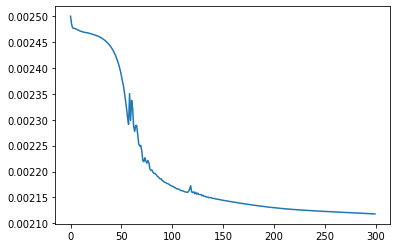

In [23]:

plt.plot(hist.history['loss'])

# Learning the Embedding

### just the encoder

In [24]:
from keras.models import Model
from keras.utils import plot_model
modelEnc = Model(inputs=model.inputs, outputs=model.layers[0].output)
modelEnc.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5_input (InputLayer)    (None, 400, 13)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 400, 128)          72704     
Total params: 72,704
Trainable params: 72,704
Non-trainable params: 0
_________________________________________________________________


In [25]:
Embedding=modelEnc.predict(input[0][np.newaxis, :])

In [26]:
print('Embedding')
print(Embedding)

Embedding
[[[0.         0.00830072 0.01347106 ... 0.         0.02518326 0.02375103]
  [0.00474491 0.01447491 0.02231676 ... 0.00296376 0.04451879 0.03307464]
  [0.01201818 0.01515392 0.02809324 ... 0.00621294 0.05951793 0.04259395]
  ...
  [0.00915679 0.01971147 0.         ... 0.03831594 0.03121482 0.        ]
  [0.00915679 0.01971147 0.         ... 0.03831594 0.03121482 0.        ]
  [0.00915679 0.01971147 0.         ... 0.03831594 0.03121482 0.        ]]]
